In [1]:
import pandas as pd
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from itertools import combinations
import scipy.cluster.hierarchy as sch
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw


In [20]:

import pandas as pd
import requests
from io import StringIO
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define the URL
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/230705_AMR_mysterious_NCBI_all_nelly.csv'

# Make a GET request to fetch the data from the URL
response = requests.get(url)

# Read the response content into a DataFrame
df = pd.read_csv(StringIO(response.text))
# Assuming you have a DataFrame named df and you want to remove a column named "included"
column_name = 'included'
# Remove the column from the DataFrame
df = df.drop(column_name, axis=1)
df.reset_index(drop=True, inplace=True)
Color = df['City'].map({'NYC': '#fb8072', 'BAL': '#8dd3c7','DEN':'#ffffb3','MIN': '#bebada','SAC':'#80b1d3','SAN':'#efa92a','mysterious':'#b3de69'})
# Inserting the new column as the second column
df.insert(1, 'Color', Color)

# Extract the columns for clustering and labeling
data = df.iloc[:, 6:].values
labels = df['Species'].values+"_"+df['City'].values+"_"+df['ID'].values
#---------------------------- 
Klebsiella = df[df['Species'] == 'Klebsiella pneumoniae']
Enterobacter= df[df['Species'] == 'Enterobacter hormaechei']
Escherichia = df[df['Species'] == 'Escherichia coli']

#------------ sqaure matrix to TDA analysis
dist_matrix = pdist(df.iloc[:,6:].values, metric='hamming')
# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

distances=dist_matrix_square
threshold=.25
#print(distances.shape)
#print(data)
#print(df.iloc[0:145,:])
print("Klebsiella",Klebsiella.shape,"Enterobacter",Enterobacter.shape,"Escherichia",Escherichia.shape)

Klebsiella (225, 511) Enterobacter (28, 511) Escherichia (34, 511)


usetex mode requires dvipng.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

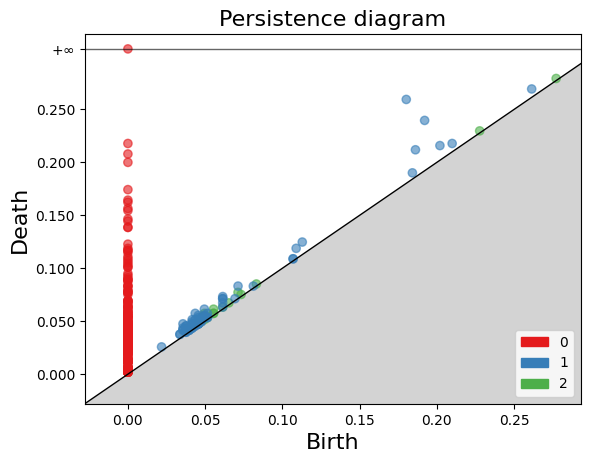

In [4]:
dist_matrix=dist_matrix_square
max_edge_length = 2
# Rips complex with the distance matrix
#start_time = time.time()

rips_complex = gd.RipsComplex(
    distance_matrix = dist_matrix,
    max_edge_length = max_edge_length
)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    # Compute the persistence of the simplicial complex
persistence = simplex_tree.persistence()
gd.plot_persistence_diagram(persistence,legend=True)

#gd.plot_persistence_barcode(persistence_1)

Klenbsiella

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

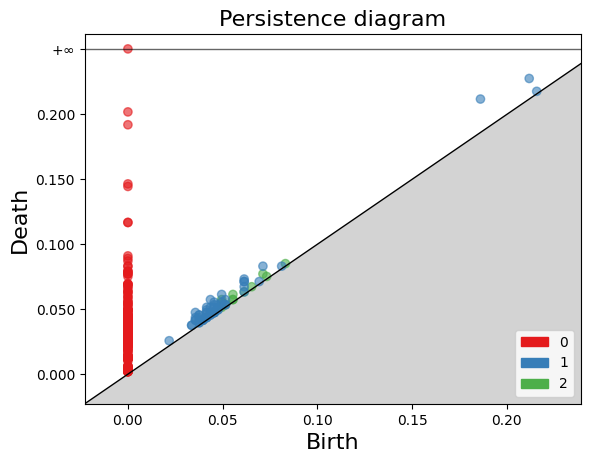

In [11]:

#------------ sqaure matrix to TDA analysis
dist_matrix = pdist(Klebsiella.iloc[:,6:].values, metric='hamming')
# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

distances=dist_matrix_square

dist_matrix=dist_matrix_square
max_edge_length = 2
# Rips complex with the distance matrix
#start_time = time.time()

rips_complex = gd.RipsComplex(
    distance_matrix = dist_matrix,
    max_edge_length = max_edge_length
)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    # Compute the persistence of the simplicial complex
persistence = simplex_tree.persistence()
gd.plot_persistence_diagram(persistence,legend=True)

gd.plot_persistence_barcode(persistence)


Ahora Escherichia


             ID    Color           Species        City AST-based group  \
8            S9  #b3de69  Escherichia coli  mysterious   3GC-resistant   
9           S10  #b3de69  Escherichia coli  mysterious          CP CRE   
10          S11  #b3de69  Escherichia coli  mysterious          CP CRE   
11          S12  #b3de69  Escherichia coli  mysterious          CP CRE   
12          S13  #b3de69  Escherichia coli  mysterious          CP CRE   
13          S14  #b3de69  Escherichia coli  mysterious          CP CRE   
14          S15  #b3de69  Escherichia coli  mysterious          CP CRE   
15          S16  #b3de69  Escherichia coli  mysterious          CP CRE   
16          S17  #b3de69  Escherichia coli  mysterious          CP CRE   
17          S18  #b3de69  Escherichia coli  mysterious          CP CRE   
18          S19  #b3de69  Escherichia coli  mysterious          CP CRE   
19          S20  #b3de69  Escherichia coli  mysterious          CP CRE   
20          S21  #b3de69  Escherichia 

<AxesSubplot:title={'center':'Persistence barcode'}>

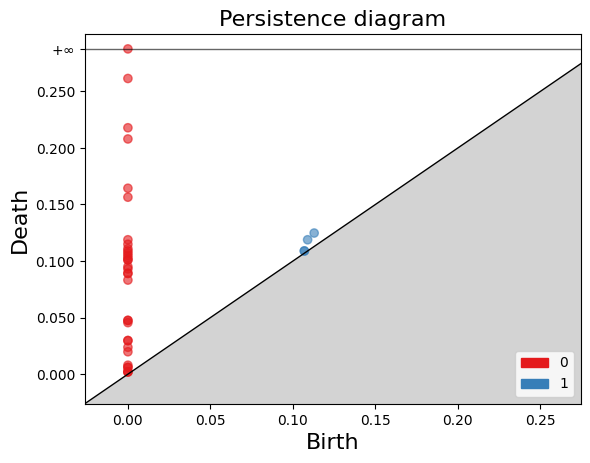

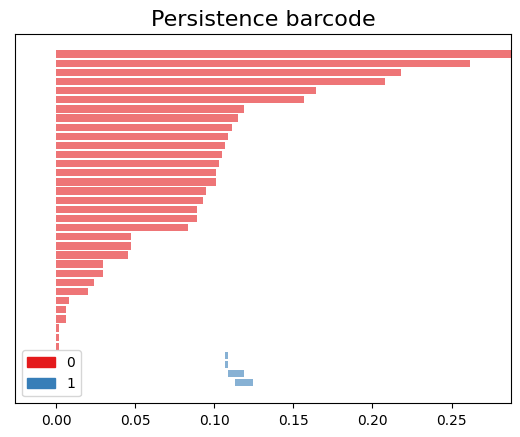

In [23]:

#------------ sqaure matrix to TDA analysis
dist_matrix = pdist(Escherichia.iloc[:,6:].values, metric='hamming')
# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

distances=dist_matrix_square

dist_matrix=dist_matrix_square
max_edge_length = 2
# Rips complex with the distance matrix
#start_time = time.time()

rips_complex = gd.RipsComplex(
    distance_matrix = dist_matrix,
    max_edge_length = max_edge_length
)

Es_simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    # Compute the persistence of the simplicial complex
Es_persistence = Es_simplex_tree.persistence()
gd.plot_persistence_diagram(Es_persistence,legend=True)

gd.plot_persistence_barcode(Es_persistence)


Escherichia sin NCBI genomes

<AxesSubplot:title={'center':'Persistence barcode'}>

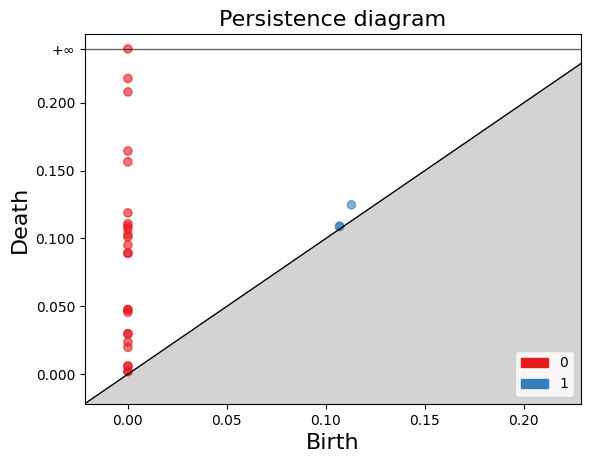

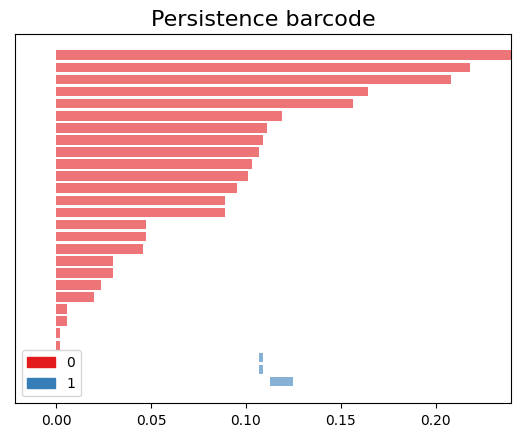

In [44]:
#print(Escherichia.iloc[:,6:])
#print(Escherichia)  

# Select rows where the ID does not contain 'GCF'
Es_filtered_rows = Escherichia[~Escherichia['ID'].str.contains('GCF')]
Es_filtered_rows = filtered_rows.reset_index(drop=True)


# Display the selected rows
#print( Es_filtered_rows )

#------------ sqaure matrix to TDA analysis
dist_matrix = pdist(Es_filtered_rows .iloc[:,6:].values, metric='hamming')
# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

distances=dist_matrix_square

dist_matrix=dist_matrix_square
max_edge_length = 2
# Rips complex with the distance matrix
#start_time = time.time()

rips_complex = gd.RipsComplex(
    distance_matrix = dist_matrix,
    max_edge_length = max_edge_length
)

Es_noNCBI_simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    # Compute the persistence of the simplicial complex
Es_noNCBI_persistence = Es_noNCBI_simplex_tree.persistence()
gd.plot_persistence_diagram(Es_noNCBI_persistence,legend=True)

gd.plot_persistence_barcode(Es_noNCBI_persistence)



In [45]:
print(Es_filtered_rows)

            ID    Color           Species        City AST-based group  \
0           S9  #b3de69  Escherichia coli  mysterious   3GC-resistant   
1          S10  #b3de69  Escherichia coli  mysterious          CP CRE   
2          S11  #b3de69  Escherichia coli  mysterious          CP CRE   
3          S12  #b3de69  Escherichia coli  mysterious          CP CRE   
4          S13  #b3de69  Escherichia coli  mysterious          CP CRE   
5          S14  #b3de69  Escherichia coli  mysterious          CP CRE   
6          S15  #b3de69  Escherichia coli  mysterious          CP CRE   
7          S16  #b3de69  Escherichia coli  mysterious          CP CRE   
8          S17  #b3de69  Escherichia coli  mysterious          CP CRE   
9          S18  #b3de69  Escherichia coli  mysterious          CP CRE   
10         S19  #b3de69  Escherichia coli  mysterious          CP CRE   
11         S20  #b3de69  Escherichia coli  mysterious          CP CRE   
12         S21  #b3de69  Escherichia coli  mysterio

In [69]:
Escherichia = Escherichia.reset_index(drop=True)
dist_matrix = pdist(Escherichia.iloc[:,6:].values, metric='hamming')
# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)
distances=dist_matrix_square
threshold=.25
import networkx as nx
import plotly.graph_objects as go

# Assuming you have a distance matrix named distances and a distance threshold parameter named threshold
# distances is a square matrix with pairwise distances between sequences
# threshold is the maximum distance for connecting sequences

# Create a NetworkX graph
G = nx.Graph()
# Add nodes to the graph (sequences as dots)
num_sequences = len(distances)
G.add_nodes_from(range(num_sequences))

# Add edges to the graph based on the distance threshold
for i in range(num_sequences):
    for j in range(i+1, num_sequences):
        if distances[i, j] <= threshold:
            G.add_edge(i, j)

# Create node positions for plotting
pos = nx.spring_layout(G)

# Create edge traces for plotting
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Update edge traces with node positions
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create node traces for plotting
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlOrRd',
        reversescale=True,
        color=[],
        size=10,
        line_width=0))

# Update node traces with node positions and text labels
node_traceC = []  # Added city trace
node_traceT = []  # Added city trace

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_traceT.append(Escherichia['ID'][node])
    node_traceC.append(Escherichia['Color'][node])
    #node_trace['marker']['color'] += tuple(['#ff0000' if node == 0 else '#0000ff'])  # Color the first sequence red and others blue

node_trace['marker']['color'] = node_traceC  # Update marker color property
node_trace['text'] = node_traceT  # Update marker color property

#print(node_trace)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Sequence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Add interactivity to the plot
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Show All", method="relayout", args=["xaxis.range", [0, 1]], args2=["yaxis.range", [0, 1]]),
                dict(label="Reset", method="relayout", args=["xaxis.range", [-0.1, 1.1]], args2=["yaxis.range", [-0.1, 1.1]])
            ],
            direction="left",
            pad={"r": 10,"b": 10},
            showactive=False,
            x=0.01,
            xanchor="left",
            y=0.05,
            yanchor="bottom"
        ),
    ]
)

# Show the interactive network plot
fig.show()


In [60]:
#Escherichia = Escherichia.reset_index(drop=True)
#dist_matrix = pdist(Escherichia.iloc[:,6:].values, metric='hamming')
# Convert the pairwise distances to a square distance matrix
#dist_matrix_square = squareform(dist_matrix)
distances=dist_matrix_square
threshold=.1

In [61]:
import networkx as nx
import plotly.graph_objects as go
threshold=.1
# Assuming you have a distance matrix named distances and a distance threshold parameter named threshold
# distances is a square matrix with pairwise distances between sequences
# threshold is the maximum distance for connecting sequences

# Create a NetworkX graph
G = nx.Graph()
# Add nodes to the graph (sequences as dots)
num_sequences = len(distances)
G.add_nodes_from(range(num_sequences))

# Add edges to the graph based on the distance threshold
for i in range(num_sequences):
    for j in range(i+1, num_sequences):
        if distances[i, j] <= threshold:
            G.add_edge(i, j)

# Create node positions for plotting
pos = nx.spring_layout(G)

# Create edge traces for plotting
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Update edge traces with node positions
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create node traces for plotting
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlOrRd',
        reversescale=True,
        color=[],
        size=10,
        line_width=0))

# Update node traces with node positions and text labels
node_traceC = []  # Added city trace
node_traceT = []  # Added city trace

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_traceT.append(Es_filtered_rows['ID'][node])
    node_traceC.append(Es_filtered_rows['Color'][node])
    #node_trace['marker']['color'] += tuple(['#ff0000' if node == 0 else '#0000ff'])  # Color the first sequence red and others blue

node_trace['marker']['color'] = node_traceC  # Update marker color property
node_trace['text'] = node_traceT  # Update marker color property

print(node_trace)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Sequence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Add interactivity to the plot
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Show All", method="relayout", args=["xaxis.range", [0, 1]], args2=["yaxis.range", [0, 1]]),
                dict(label="Reset", method="relayout", args=["xaxis.range", [-0.1, 1.1]], args2=["yaxis.range", [-0.1, 1.1]])
            ],
            direction="left",
            pad={"r": 10,"b": 10},
            showactive=False,
            x=0.01,
            xanchor="left",
            y=0.05,
            yanchor="bottom"
        ),
    ]
)

# Show the interactive network plot
fig.show()


KeyError: 26

In [48]:

threshold=.12
# Assuming you have a distance matrix named distances and a distance threshold parameter named threshold
# distances is a square matrix with pairwise distances between sequences
# threshold is the maximum distance for connecting sequences

# Create a NetworkX graph
G = nx.Graph()
# Add nodes to the graph (sequences as dots)
num_sequences = len(distances)
G.add_nodes_from(range(num_sequences))

# Add edges to the graph based on the distance threshold
for i in range(num_sequences):
    for j in range(i+1, num_sequences):
        if distances[i, j] <= threshold:
            G.add_edge(i, j)

# Create node positions for plotting
pos = nx.spring_layout(G)

# Create edge traces for plotting
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Update edge traces with node positions
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create node traces for plotting
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlOrRd',
        reversescale=True,
        color=[],
        size=10,
        line_width=0))

# Update node traces with node positions and text labels
node_traceC = []  # Added city trace
node_traceT = []  # Added city trace

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_traceT.append(Es_filtered_rows['ID'][node])
    node_traceC.append(Es_filtered_rows['Color'][node])
    #node_trace['marker']['color'] += tuple(['#ff0000' if node == 0 else '#0000ff'])  # Color the first sequence red and others blue

node_trace['marker']['color'] = node_traceC  # Update marker color property
node_trace['text'] = node_traceT  # Update marker color property

print(node_trace)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Sequence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Add interactivity to the plot
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Show All", method="relayout", args=["xaxis.range", [0, 1]], args2=["yaxis.range", [0, 1]]),
                dict(label="Reset", method="relayout", args=["xaxis.range", [-0.1, 1.1]], args2=["yaxis.range", [-0.1, 1.1]])
            ],
            direction="left",
            pad={"r": 10,"b": 10},
            showactive=False,
            x=0.01,
            xanchor="left",
            y=0.05,
            yanchor="bottom"
        ),
    ]
)

# Show the interactive network plot
fig.show()


Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [#b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #8dd3c7, #ffffb3, #fb8072, #efa92a,
                         #bebada, #80b1d3, #8dd3c7, #ffffb3, #fb8072, #80b1d3,
                         #efa92a, #bebada],
               'colorscale': [[0.0, 'rgb(255,255,204)'], [0.125,
                              'rgb(255,237,160)'], [0.25, 'rgb(254,217,118)'],
                              [0.375, 'rgb(254,178,76)'], [0.5, 'rgb(253,141,60)'],
                              [0.625, 'rgb(252,78,42)'], [0.75, 'rgb(227,26,28)'],
                              [0.875, 'rgb(189,0,38)'], [1.0, 'rgb(128,0,38)']],
               'line': {'width': 0},
               'reversescale': True,
               'showscale': False,
               'size': 10},
    'mode': 'markers',
    'text': [S9, S10, S11, S12, S13, S14, S15, S16, S

In [49]:

threshold=.15
# Assuming you have a distance matrix named distances and a distance threshold parameter named threshold
# distances is a square matrix with pairwise distances between sequences
# threshold is the maximum distance for connecting sequences

# Create a NetworkX graph
G = nx.Graph()
# Add nodes to the graph (sequences as dots)
num_sequences = len(distances)
G.add_nodes_from(range(num_sequences))

# Add edges to the graph based on the distance threshold
for i in range(num_sequences):
    for j in range(i+1, num_sequences):
        if distances[i, j] <= threshold:
            G.add_edge(i, j)

# Create node positions for plotting
pos = nx.spring_layout(G)

# Create edge traces for plotting
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Update edge traces with node positions
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create node traces for plotting
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlOrRd',
        reversescale=True,
        color=[],
        size=10,
        line_width=0))

# Update node traces with node positions and text labels
node_traceC = []  # Added city trace
node_traceT = []  # Added city trace

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_traceT.append(Es_filtered_rows['ID'][node])
    node_traceC.append(Es_filtered_rows['Color'][node])
    #node_trace['marker']['color'] += tuple(['#ff0000' if node == 0 else '#0000ff'])  # Color the first sequence red and others blue

node_trace['marker']['color'] = node_traceC  # Update marker color property
node_trace['text'] = node_traceT  # Update marker color property

print(node_trace)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Sequence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Add interactivity to the plot
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Show All", method="relayout", args=["xaxis.range", [0, 1]], args2=["yaxis.range", [0, 1]]),
                dict(label="Reset", method="relayout", args=["xaxis.range", [-0.1, 1.1]], args2=["yaxis.range", [-0.1, 1.1]])
            ],
            direction="left",
            pad={"r": 10,"b": 10},
            showactive=False,
            x=0.01,
            xanchor="left",
            y=0.05,
            yanchor="bottom"
        ),
    ]
)

# Show the interactive network plot
fig.show()


Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [#b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #8dd3c7, #ffffb3, #fb8072, #efa92a,
                         #bebada, #80b1d3, #8dd3c7, #ffffb3, #fb8072, #80b1d3,
                         #efa92a, #bebada],
               'colorscale': [[0.0, 'rgb(255,255,204)'], [0.125,
                              'rgb(255,237,160)'], [0.25, 'rgb(254,217,118)'],
                              [0.375, 'rgb(254,178,76)'], [0.5, 'rgb(253,141,60)'],
                              [0.625, 'rgb(252,78,42)'], [0.75, 'rgb(227,26,28)'],
                              [0.875, 'rgb(189,0,38)'], [1.0, 'rgb(128,0,38)']],
               'line': {'width': 0},
               'reversescale': True,
               'showscale': False,
               'size': 10},
    'mode': 'markers',
    'text': [S9, S10, S11, S12, S13, S14, S15, S16, S

In [50]:

threshold=.18
# Assuming you have a distance matrix named distances and a distance threshold parameter named threshold
# distances is a square matrix with pairwise distances between sequences
# threshold is the maximum distance for connecting sequences

# Create a NetworkX graph
G = nx.Graph()
# Add nodes to the graph (sequences as dots)
num_sequences = len(distances)
G.add_nodes_from(range(num_sequences))

# Add edges to the graph based on the distance threshold
for i in range(num_sequences):
    for j in range(i+1, num_sequences):
        if distances[i, j] <= threshold:
            G.add_edge(i, j)

# Create node positions for plotting
pos = nx.spring_layout(G)

# Create edge traces for plotting
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Update edge traces with node positions
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create node traces for plotting
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlOrRd',
        reversescale=True,
        color=[],
        size=10,
        line_width=0))

# Update node traces with node positions and text labels
node_traceC = []  # Added city trace
node_traceT = []  # Added city trace

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_traceT.append(Es_filtered_rows['ID'][node])
    node_traceC.append(Es_filtered_rows['Color'][node])
    #node_trace['marker']['color'] += tuple(['#ff0000' if node == 0 else '#0000ff'])  # Color the first sequence red and others blue

node_trace['marker']['color'] = node_traceC  # Update marker color property
node_trace['text'] = node_traceT  # Update marker color property

print(node_trace)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Sequence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Add interactivity to the plot
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Show All", method="relayout", args=["xaxis.range", [0, 1]], args2=["yaxis.range", [0, 1]]),
                dict(label="Reset", method="relayout", args=["xaxis.range", [-0.1, 1.1]], args2=["yaxis.range", [-0.1, 1.1]])
            ],
            direction="left",
            pad={"r": 10,"b": 10},
            showactive=False,
            x=0.01,
            xanchor="left",
            y=0.05,
            yanchor="bottom"
        ),
    ]
)

# Show the interactive network plot
fig.show()


Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [#b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #8dd3c7, #ffffb3, #fb8072, #efa92a,
                         #bebada, #80b1d3, #8dd3c7, #ffffb3, #fb8072, #80b1d3,
                         #efa92a, #bebada],
               'colorscale': [[0.0, 'rgb(255,255,204)'], [0.125,
                              'rgb(255,237,160)'], [0.25, 'rgb(254,217,118)'],
                              [0.375, 'rgb(254,178,76)'], [0.5, 'rgb(253,141,60)'],
                              [0.625, 'rgb(252,78,42)'], [0.75, 'rgb(227,26,28)'],
                              [0.875, 'rgb(189,0,38)'], [1.0, 'rgb(128,0,38)']],
               'line': {'width': 0},
               'reversescale': True,
               'showscale': False,
               'size': 10},
    'mode': 'markers',
    'text': [S9, S10, S11, S12, S13, S14, S15, S16, S

In [54]:

threshold=.21
# Assuming you have a distance matrix named distances and a distance threshold parameter named threshold
# distances is a square matrix with pairwise distances between sequences
# threshold is the maximum distance for connecting sequences

# Create a NetworkX graph
G = nx.Graph()
# Add nodes to the graph (sequences as dots)
num_sequences = len(distances)
G.add_nodes_from(range(num_sequences))

# Add edges to the graph based on the distance threshold
for i in range(num_sequences):
    for j in range(i+1, num_sequences):
        if distances[i, j] <= threshold:
            G.add_edge(i, j)

# Create node positions for plotting
pos = nx.spring_layout(G)

# Create edge traces for plotting
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Update edge traces with node positions
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create node traces for plotting
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlOrRd',
        reversescale=True,
        color=[],
        size=10,
        line_width=0))

# Update node traces with node positions and text labels
node_traceC = []  # Added city trace
node_traceT = []  # Added city trace

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_traceT.append(Es_filtered_rows['ID'][node])
    node_traceC.append(Es_filtered_rows['Color'][node])
    #node_trace['marker']['color'] += tuple(['#ff0000' if node == 0 else '#0000ff'])  # Color the first sequence red and others blue

node_trace['marker']['color'] = node_traceC  # Update marker color property
node_trace['text'] = node_traceT  # Update marker color property

print(node_trace)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Sequence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Add interactivity to the plot
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Show All", method="relayout", args=["xaxis.range", [0, 1]], args2=["yaxis.range", [0, 1]]),
                dict(label="Reset", method="relayout", args=["xaxis.range", [-0.1, 1.1]], args2=["yaxis.range", [-0.1, 1.1]])
            ],
            direction="left",
            pad={"r": 10,"b": 10},
            showactive=False,
            x=0.01,
            xanchor="left",
            y=0.05,
            yanchor="bottom"
        ),
    ]
)

# Show the interactive network plot
fig.show()


Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [#b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #b3de69, #b3de69, #b3de69, #b3de69,
                         #b3de69, #b3de69, #8dd3c7, #ffffb3, #fb8072, #efa92a,
                         #bebada, #80b1d3, #8dd3c7, #ffffb3, #fb8072, #80b1d3,
                         #efa92a, #bebada],
               'colorscale': [[0.0, 'rgb(255,255,204)'], [0.125,
                              'rgb(255,237,160)'], [0.25, 'rgb(254,217,118)'],
                              [0.375, 'rgb(254,178,76)'], [0.5, 'rgb(253,141,60)'],
                              [0.625, 'rgb(252,78,42)'], [0.75, 'rgb(227,26,28)'],
                              [0.875, 'rgb(189,0,38)'], [1.0, 'rgb(128,0,38)']],
               'line': {'width': 0},
               'reversescale': True,
               'showscale': False,
               'size': 10},
    'mode': 'markers',
    'text': [S9, S10, S11, S12, S13, S14, S15, S16, S

Enterobacter

<AxesSubplot:title={'center':'Persistence barcode'}>

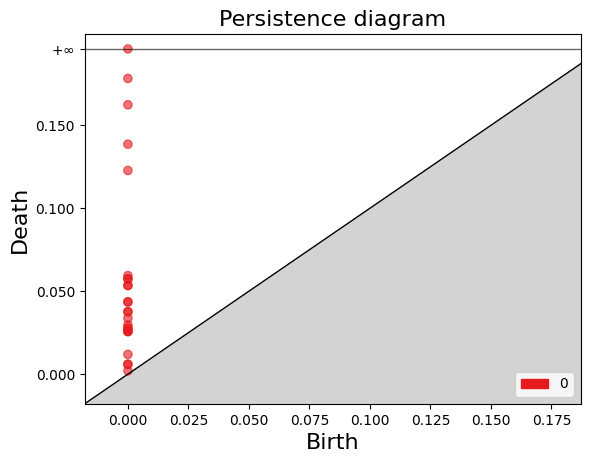

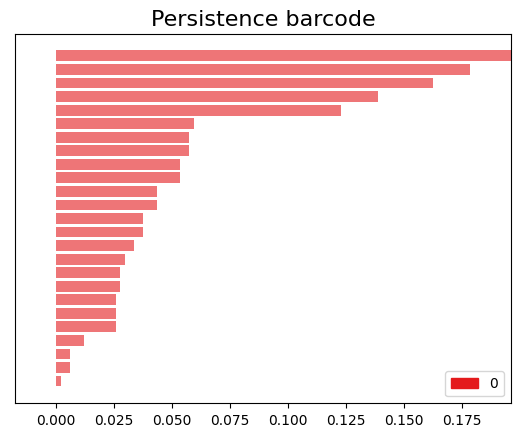

In [24]:

#------------ sqaure matrix to TDA analysis
dist_matrix = pdist(Enterobacter.iloc[:,6:].values, metric='hamming')
# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

distances=dist_matrix_square

dist_matrix=dist_matrix_square
max_edge_length = 2
# Rips complex with the distance matrix
#start_time = time.time()

rips_complex = gd.RipsComplex(
    distance_matrix = dist_matrix,
    max_edge_length = max_edge_length
)

En_simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    # Compute the persistence of the simplicial complex
En_persistence = En_simplex_tree.persistence()
gd.plot_persistence_diagram(En_persistence,legend=True)

gd.plot_persistence_barcode(En_persistence)
